In [ ]:
#Teste espectrogramas

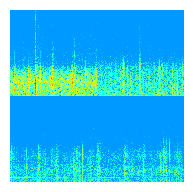

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

def plot_spectrogram(Y, sr, hop_length, i, axs, y_axis="linear", title="Spectrogram"):
    # (400/80, 320/80), dpi=80  TESTE COM DPI PARA DELIMITAÇÃO DE PIXELS
    dpi = 100  # You can adjust this value based on your needs
    width, height = 224 / dpi, 224 / dpi
    ax = axs[i // 2, i % 2]  # Calculate the position in the subplot grid
    ax.figure.set_size_inches(width, height)  # Corrected line
    ax.axis('off')
    ax.margins(0, 0)
    ax.set_ylim(10000, 48000)  # Limiting the low frequency

    # Set the desired frequency range
    fmin = 3000  # 3kHz
    fmax = 144000  # 144kHz

    specshow_obj = librosa.display.specshow(Y[i, :, :],
                                            sr=sr,
                                            hop_length=hop_length,
                                            x_axis="time",
                                            y_axis=y_axis,
                                            cmap='jet',
                                            fmin=fmin,
                                            fmax=fmax,
                                            ax=ax)
    
    specshow_obj.set_clim(-60, 10)  # Set color limits for the individual subplot
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    #ax.set_title(title)

# Example usage with subplots
#Y = np.random.rand(4, 55, 67)  # Replace this with your actual 3D array

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot spectrograms in each subplot
for i in range(4):
    plot_spectrogram(Y, sr, HOP_SIZE, i, axs, title=f"Spectrogram {i + 1}")


# Remove blank spaces around the outer borders
plt.subplots_adjust(wspace=0, hspace=0)
plt.margins(0, 0)

# Save the figure without extra white space
plt.savefig('output_figure.png', bbox_inches='tight', pad_inches=0)

# Show the subplots
plt.show()


In [84]:
test_file =  pd.read_csv('C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/labels_DeepVoice/annotation_train_clicks.csv')

In [91]:
file = test_file.loc[(test_file['filename'] == 'LPS1202017_MF_20171113_030719_394')]

In [92]:
ch = file.loc[(file['label'] == 0)] 

In [93]:
ch

,channel,begin_time,end_time,filename,call_length,label
0,3,0.000000,21.336486,LPS1202017_MF_20171113_030719_394,21.336486,0
1,2,0.000000,21.336486,LPS1202017_MF_20171113_030719_394,21.336486,0
2,1,0.000000,21.336486,LPS1202017_MF_20171113_030719_394,21.336486,0
3,4,0.000000,21.336486,LPS1202017_MF_20171113_030719_394,21.336486,0
5,2,22.365088,57.901885,LPS1202017_MF_20171113_030719_394,35.536796,0
6,4,22.365088,57.901885,LPS1202017_MF_20171113_030719_394,35.536796,0
7,3,22.365088,57.901885,LPS1202017_MF_20171113_030719_394,35.536796,0
8,1,22.365088,57.901885,LPS1202017_MF_20171113_030719_394,35.536796,0
10,2,59.106590,81.219528,LPS1202017_MF_20171113_030719_394,22.112938,0
11,3,59.106590,81.219528,LPS1202017_MF_20171113_030719_394,22.112938,0


In [146]:
#Packages
import wave
import numpy as np
import os
import librosa
import librosa.display
from pydub import AudioSegment
import IPython.display as ipd
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import csv
import math

In [147]:
###Function of spectrogram

def plot_spectrogram(Y, sr, hop_length, i, axs, y_axis="linear", title="Spectrogram"):
    # (400/80, 320/80), dpi=80  TESTE COM DPI PARA DELIMITAÇÃO DE PIXELS
    dpi = 100  # You can adjust this value based on your needs
    width, height = 224 / dpi, 224 / dpi
    ax = axs[i // 2, i % 2]  # Calculate the position in the subplot grid
    ax.figure.set_size_inches(width, height)  # Corrected line
    ax.axis('off')
    ax.margins(0, 0)
    ax.set_ylim(10000, 48000)  # Limiting the low frequency

    # Set the desired frequency range
    fmin = 3000  # 3kHz
    fmax = 144000  # 144kHz

    specshow_obj = librosa.display.specshow(Y[i, :, :],
                                            sr=sr,
                                            hop_length=hop_length,
                                            x_axis="time",
                                            y_axis=y_axis,
                                            cmap='jet',
                                            fmin=fmin,
                                            fmax=fmax,
                                            ax=ax)
    
    specshow_obj.set_clim(-60, 10)  # Set color limits for the individual subplot
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    #ax.set_title(title)




#Audio parameters

FRAME_SIZE = 1024 #samples
HOP_SIZE = 512 #samples
sr=96000


In [148]:

#####################
###ANOTTATION FILE###
#####################
test_file =  pd.read_csv('C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/labels_DeepVoice/annotation_train_clicks.csv')
file = test_file.loc[(test_file['filename'] == 'LPS1202017_MF_20171113_030719_394')]
file_raw = f'D:/AUDIOS/train/LPS1202017_MF_20171113_030719_394.wav'
audio_names = test_file['filename'].unique()

In [149]:
audio_data, sample_rate = librosa.load(file_raw, sr=None, mono=False)
#negative_images(file, file_raw, audio_data, sample_rate)

In [138]:
#Dando um loc no csv que tem as infos de negativo
ch = file.loc[(file['label'] == 0)]
#Usando só o que vamos precisar (Os canais, os audios e os labels são iguais)
ch = ch[['begin_time','end_time','call_length','filename']]  
#Agora eu tenho uma lista com os dados de cada call sem estar separado por canal. 
df = ch.groupby(['begin_time',]).first().reset_index() 



In [150]:
#Agora vamos começar a recortar
#RETIRAR ESSA LINHA ->  df = ch.loc[(file['channel'] == x +1)] #Pegando cada channel ( é x+1 porque o channel 1 tem indice 0)
i=0
#for i in  range (len(df)):  #indo linha por linha em um canal x onde o label é zero (len(df)) -> qtd linhas do canal x+1 que o label é zero
if df['call_length'].iloc[i] < 2 and i != len(df) - 1: #Se esse intervalo sem cliques for menor que dois segundo e o contador i não for o último índice de df, vá para a próxima linha não analisa essa sessão e vai pra proxima linha
    i = i+1
t_start = df['begin_time'].iloc[i] # begin time i
t_stop = df['end_time'].iloc[i] # end time i
t_start = math.ceil(t_start)  # arredonda t_start pra cima (EVITA PEGAR O RESTO DO CLICK ANTERIOR)
        #Agora temos que ver se o tempo entre t_start e t_stop é par
t = t_stop - t_start
n = int(t // 2)  #n é o número de espectrogramas
if n == 0: #Para ajeitar calls menores que 2 segundos
    n = 1    

In [151]:
n

10

In [152]:
#n é quantidade de imagens !
for j in range (n):
    t_stop = t_start + 2  #atualiza t_stop pra pegar o espectrograma de tamanho 2 segundos


     # Create a 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    for l in range (4):
        audio_clip = audio_data[l][int(t_start * sr):int(t_stop * sr)]
        #Agora a gente pega e recorta os espectrogramas 
        S_ch_raw1 = librosa.stft(audio_clip, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
        Y_scale = np.abs(S_ch_raw1) ** 2
        Y_log_scale1 = librosa.power_to_db(Y_scale)
        plot_spectrogram(Y, sr, HOP_SIZE, l, axs, title=f"Spectrogram {l + 1}")

    # Remove blank spaces around the outer borders
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.margins(0, 0)
        
    t_start = t_start + 2  #vai passando pro proximo espectrograma até dar n, porque n é a quantidade de espectrogramas que tem no intervalo anotado no csv

    output_folder = 'D:/IMAGES_CNN/greyscale_4channels/train/negative'
    # Salve a figura no formato desejado (por exemplo, PNG)
    output_path = os.path.join(output_folder, f'NegativeImg_line_{i+1}_spec_{j+1}_{ch["filename"].iloc[i]}_{df["begin_time"].iloc[i]}_{df["end_time"].iloc[i]}.png')
    plt.savefig(output_path,bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f"POSITIVE -> Audio , Linha {i}/{len(df)} , Espectrograma número {j}/{n}")



#####################

MemoryError: Unable to allocate 471. MiB for an array with shape (15448482, 4) and data type float64

MemoryError: Unable to allocate 471. MiB for an array with shape (15448482, 4) and data type float64

<Figure size 224x224 with 4 Axes>